In [1]:
from IPython.display import IFrame
IFrame('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names', 700, 400)

In [3]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
#a dataset that is more realistic
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score

df = pd.read_csv('../../data/housing.data.txt', sep="\s+")
df.columns = ['crim', 'zn', 'indux', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
price = df['tax'] * 100
del df['tax']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=0)

### Normalizing data (Scaling data)

The normalizer here (Standard Scaler) helps us converge quicker.  

![normalize](https://upload.wikimedia.org/math/7/6/5/76512b142c1b7e27e8a7e7eb1fc11225.png)

In [25]:
clf = SGDRegressor(loss='squared_loss', penalty='l1')
clf.fit(X_train, y_train.values)
y_pred = clf.predict(X_test)

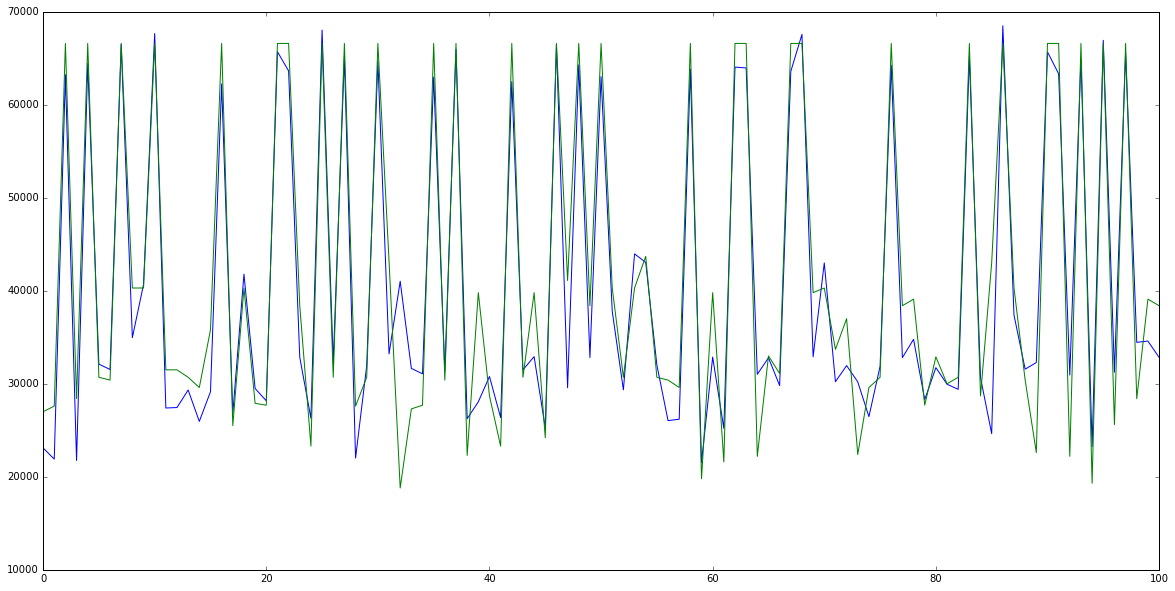

In [24]:
plt.figure(figsize=(20,10))
plt.plot(np.reshape(y_pred, (y_pred.shape[0], 1))) 
plt.plot(np.reshape(y_test, (y_test.shape[0], 1)))

In [26]:
explained_variance_score(y_test, y_pred)

0.91355263672849196

In [41]:
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train.values)
y_pred = clf.predict(X_test)
explained_variance_score(y_test, y_pred)

0.97129887402485615

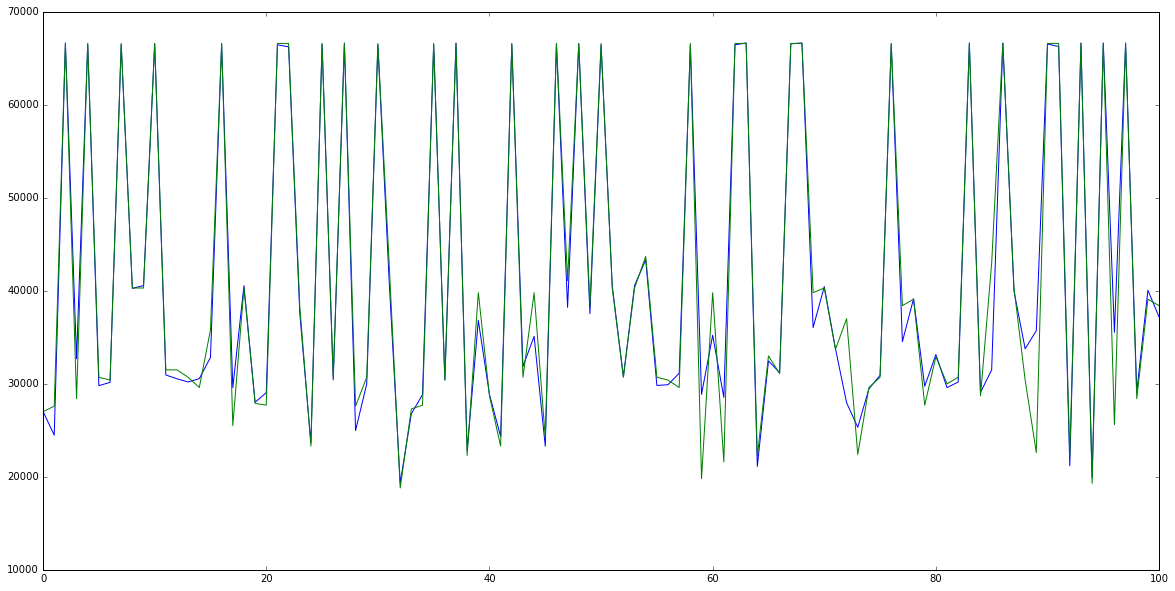

In [42]:
plt.figure(figsize=(20,10))
plt.plot(np.reshape(y_pred, (y_pred.shape[0], 1))) 
plt.plot(np.reshape(y_test, (y_test.shape[0], 1)))

References:
gradient-descent-linear-regression http://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/